In [113]:
import re
import numpy as np
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [114]:
data = "Capitalism is an economic system characterized by private ownership of resources and means of production, where individuals and businesses operate for profit in a competitive market. \
It is driven by the principles of supply and demand, with minimal government interference, allowing market forces to determine prices, production, and distribution of goods and services. \
In a capitalist economy, individuals have the freedom to choose their professions, invest in businesses, and consume products according to their preferences and purchasing power. \
Innovation, efficiency, and productivity are highly encouraged, as competition motivates firms to improve quality, reduce costs, and introduce new technologies. \
This has led to remarkable economic growth, improved living standards, and the development of global trade. However, capitalism also has significant drawbacks. \
It tends to create economic inequalities, as wealth often becomes concentrated in the hands of a few, leaving others with limited opportunities. \
The pursuit of profit can lead to exploitation of labor, environmental degradation, and neglect of social welfare. Critics argue that unregulated capitalism prioritizes monetary gain over \
human and ecological well-being. To address these issues, many nations adopt a mixed economy, blending capitalist market mechanisms with government regulation and social policies. \
Despite its imperfections, capitalism remains the dominant global economic system, as it fosters innovation, entrepreneurship, and individual freedom. \
It continuously evolves to adapt to changing social, technological, and environmental challenges, shaping modern civilization and influencing how societies function and progress. \
In essence, capitalism is not just an economic model but also a cultural and social force that reflects human ambition, creativity, and the desire for prosperity. \
Its strength lies in its dynamism and adaptability, but its sustainability depends on balancing profit motives with social responsibility and equitable growth for all."

In [115]:
# Normalization
data_lower = data.lower()
data_no_punc = re.sub(r'[^\w\s]','', data_lower)
stop_words = set(stopwords.words('english'))
no_stopwords_string = ''
data_list = data_no_punc.split()
for word in data_list:
  if((word in stop_words) == False):
    no_stopwords_string += word
  no_stopwords_string += ' '

# Normalized Text
print(f"Normalized Text: {no_stopwords_string}")

# Word Tokenized Text
normalized_list = no_stopwords_string.split()
print(f"Word Tokenized Text: {normalized_list}")

Normalized Text: capitalism   economic system characterized  private ownership  resources  means  production  individuals  businesses operate  profit   competitive market   driven   principles  supply  demand  minimal government interference allowing market forces  determine prices production  distribution  goods  services   capitalist economy individuals   freedom  choose  professions invest  businesses  consume products according   preferences  purchasing power innovation efficiency  productivity  highly encouraged  competition motivates firms  improve quality reduce costs  introduce new technologies   led  remarkable economic growth improved living standards   development  global trade however capitalism also  significant drawbacks  tends  create economic inequalities  wealth often becomes concentrated   hands    leaving others  limited opportunities  pursuit  profit  lead  exploitation  labor environmental degradation  neglect  social welfare critics argue  unregulated capitalism p

In [116]:
# Word Tokenization
data_tokenized = word_tokenize(no_stopwords_string)
print(f"Tokenized data: {data_tokenized}")

Tokenized data: ['capitalism', 'economic', 'system', 'characterized', 'private', 'ownership', 'resources', 'means', 'production', 'individuals', 'businesses', 'operate', 'profit', 'competitive', 'market', 'driven', 'principles', 'supply', 'demand', 'minimal', 'government', 'interference', 'allowing', 'market', 'forces', 'determine', 'prices', 'production', 'distribution', 'goods', 'services', 'capitalist', 'economy', 'individuals', 'freedom', 'choose', 'professions', 'invest', 'businesses', 'consume', 'products', 'according', 'preferences', 'purchasing', 'power', 'innovation', 'efficiency', 'productivity', 'highly', 'encouraged', 'competition', 'motivates', 'firms', 'improve', 'quality', 'reduce', 'costs', 'introduce', 'new', 'technologies', 'led', 'remarkable', 'economic', 'growth', 'improved', 'living', 'standards', 'development', 'global', 'trade', 'however', 'capitalism', 'also', 'significant', 'drawbacks', 'tends', 'create', 'economic', 'inequalities', 'wealth', 'often', 'becomes'

In [117]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
data_lemmatized = []
# DT->Determiner, JJ->Adjective, NN->Noun, VBZ->Verb, IN->Preposition, RB->Adverb, VBN->Past Participle Verb,
# NNS->Noun Plural, VBP->Verb Non-3rd Person Singular Present, VBG->Verb Gerund or Present Participle
# JJR->Comparitive Adjective, JJS->Superlative Adjective, VBD->Verb Past Tense
data_pos_tokens = pos_tag(data_tokenized)
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return 'a'
    elif tag.startswith('V'):
        return 'v'
    elif tag.startswith('N'):
        return 'n'
    elif tag.startswith('R'):
        return 'r'
    else:
        return 'n'
data_lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in data_pos_tokens]
print(f"Lemmatized data: {data_lemmatized}")

Lemmatized data: ['capitalism', 'economic', 'system', 'characterize', 'private', 'ownership', 'resource', 'mean', 'production', 'individual', 'business', 'operate', 'profit', 'competitive', 'market', 'driven', 'principle', 'supply', 'demand', 'minimal', 'government', 'interference', 'allow', 'market', 'force', 'determine', 'price', 'production', 'distribution', 'good', 'service', 'capitalist', 'economy', 'individual', 'freedom', 'choose', 'profession', 'invest', 'business', 'consume', 'product', 'accord', 'preference', 'purchase', 'power', 'innovation', 'efficiency', 'productivity', 'highly', 'encourage', 'competition', 'motivate', 'firm', 'improve', 'quality', 'reduce', 'cost', 'introduce', 'new', 'technology', 'lead', 'remarkable', 'economic', 'growth', 'improve', 'living', 'standard', 'development', 'global', 'trade', 'however', 'capitalism', 'also', 'significant', 'drawback', 'tend', 'create', 'economic', 'inequality', 'wealth', 'often', 'becomes', 'concentrated', 'hand', 'leave', 

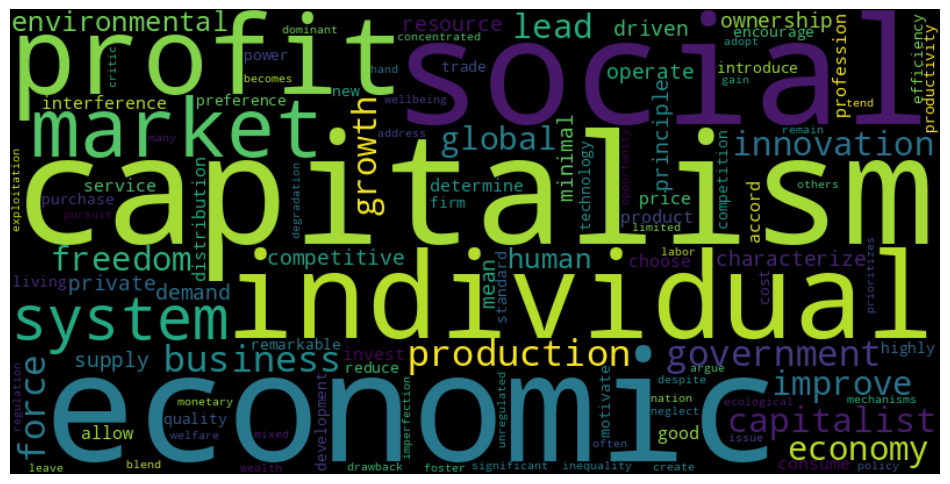

In [118]:
# Wordcloud
wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='black',
        stopwords=STOPWORDS,
        min_font_size=10
    ).generate(" ".join(data_lemmatized))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Text(0, 0.5, 'Frequency')

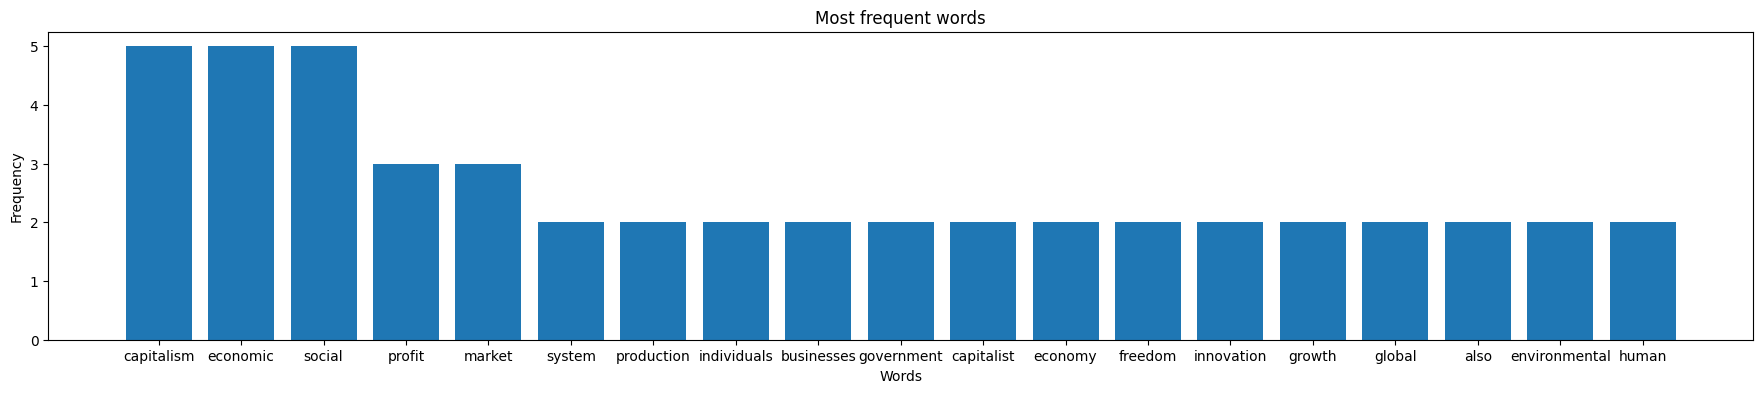

In [119]:
# Word Count
word_count = {}
data_sent_tokenized = sent_tokenize(data_lower)
for i in range(len(data_sent_tokenized)):
  data_sent_tokenized[i] = re.sub(r'\W', ' ', data_sent_tokenized[i])
  data_sent_tokenized[i] = re.sub(r'\s+', ' ', data_sent_tokenized[i])

for sent in data_sent_tokenized:
  words = word_tokenize(sent)
  for word in words:
    if(word not in stop_words):
      if(word in word_count):
        word_count[word] += 1
      else:
        word_count[word] = 1

word_count_sorted = sorted(word_count.items(), key = lambda item: item[1], reverse = True)
word_count_sorted_subset = []
for item in word_count_sorted:
  if(item[1] > 1):
    word_count_sorted_subset.append(item)

plt.figure(figsize = (22, 4))
plt.bar([item[0] for item in word_count_sorted_subset], [item[1] for item in word_count_sorted_subset])
plt.title('Most frequent words')
plt.xlabel('Words')
plt.ylabel('Frequency')

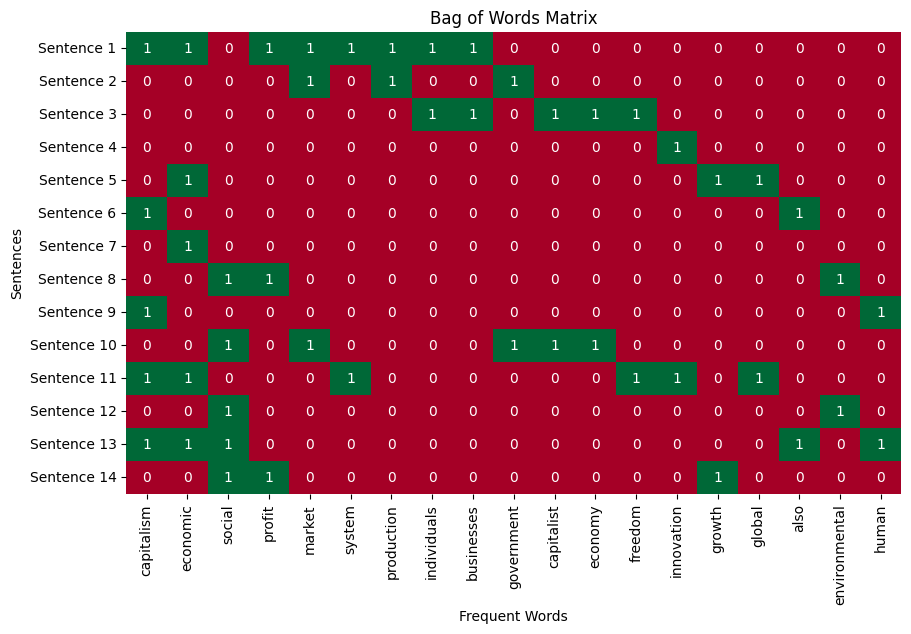

In [120]:
# Bag of Words
word_freq = [item[0] for item in word_count_sorted_subset]
bog_matrix = []
for sent in data_sent_tokenized:
  vector = []
  sent_words = word_tokenize(sent)
  for word in word_freq:
    if(word in sent_words):
      vector.append(1)
    else:
      vector.append(0)
  bog_matrix.append(vector)
bog_matrix = np.asarray(bog_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(bog_matrix, cmap='RdYlGn', cbar=False, annot=True, fmt="d", xticklabels=word_freq, yticklabels=[f"Sentence {i+1}" for i in range(len(data_sent_tokenized))])

plt.title('Bag of Words Matrix')
plt.xlabel('Frequent Words')
plt.ylabel('Sentences')
plt.show()

In [122]:
# TF-IDF
data_sent_tokenized_new = []
for sent in data_sent_tokenized:
  words = word_tokenize(sent)
  new_sent = []
  for word in words:
    if(word not in stop_words):
      new_sent.append(word)
  data_sent_tokenized_new.append(" ".join(new_sent))

vectorizer = TfidfVectorizer()
result = vectorizer.fit_transform(data_sent_tokenized_new)
print("IDF values")
i = 0
for e1, e2 in zip(vectorizer.get_feature_names_out(), vectorizer.idf_):
  if(i < 5):
    print(e1 + ": " + str(e2))
  else:
    break
  i+=1
print(f"Word Index: {vectorizer.vocabulary_}")
print(f"\n(Document number, Word index)\tTF-IDF values\n{result}")

IDF values
according: 3.0149030205422647
adapt: 3.0149030205422647
adaptability: 3.0149030205422647
address: 3.0149030205422647
adopt: 3.0149030205422647
Word Index: {'capitalism': 13, 'economic': 43, 'system': 139, 'characterized': 17, 'private': 112, 'ownership': 105, 'resources': 128, 'means': 89, 'production': 113, 'individuals': 72, 'businesses': 12, 'operate': 102, 'profit': 117, 'competitive': 21, 'market': 88, 'driven': 40, 'principles': 110, 'supply': 137, 'demand': 31, 'minimal': 91, 'government': 62, 'interference': 76, 'allowing': 5, 'forces': 55, 'determine': 35, 'prices': 109, 'distribution': 37, 'goods': 61, 'services': 130, 'capitalist': 14, 'economy': 44, 'freedom': 57, 'choose': 18, 'professions': 116, 'invest': 78, 'consume': 23, 'products': 115, 'according': 0, 'preferences': 108, 'purchasing': 120, 'power': 107, 'innovation': 75, 'efficiency': 45, 'productivity': 114, 'highly': 65, 'encouraged': 46, 'competition': 20, 'motivates': 96, 'firms': 53, 'improve': 69, 'q